In [ ]:
import pandas as pd # To convert data into pandas dataframe
import numpy as np # For data and large type of arrays manipulation
import matplotlib.pyplot as plt #For data visualisation
import seaborn as sns # For data visualisation
import plotly.express as px #For data visualisation

# Data Preprocessing 

In [ ]:
# df=pd.read_csv('../Master_Training_File/Zomato.csv') #Convert csv file to Pandas DataFrame
df=pd.read_csv("sample_data/Zomato.csv") #Convert csv file to Pandas DataFrame

In [ ]:
df.head(7) #Looking at the head

,serial,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_two_people,reviews_list,menu_item,listed_in_type,listed_in_city
0,0.0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775.0,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1.0,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2.0,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3.0,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4.0,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166.0,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,5.0,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286.0,+91 9980040002\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,6.0,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8.0,+91 9731716688\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari


In [ ]:
for col in df.columns:
    print(f'Column: {col} has',len(df[col].unique()),'unique Values.') #Seeing the unique values of every column

Column: serial has 1000 unique Values.
Column: url has 1000 unique Values.
Column: address has 713 unique Values.
Column: name has 684 unique Values.
Column: online_order has 2 unique Values.
Column: book_table has 2 unique Values.
Column: rate has 26 unique Values.
Column: votes has 306 unique Values.
Column: phone has 781 unique Values.
Column: location has 15 unique Values.
Column: rest_type has 40 unique Values.
Column: dish_liked has 320 unique Values.
Column: cuisines has 345 unique Values.
Column: approx_cost_for_two_people has 27 unique Values.
Column: reviews_list has 708 unique Values.
Column: menu_item has 256 unique Values.
Column: listed_in_type has 6 unique Values.
Column: listed_in_city has 2 unique Values.


In [ ]:
df.isnull().sum() #Seeing the null values

serial                          0
url                             0
address                         0
name                            0
online_order                    0
book_table                      0
rate                          100
votes                           0
phone                          16
location                        0
rest_type                       1
dish_liked                    547
cuisines                        3
approx_cost_for_two_people      0
reviews_list                    0
menu_item                       0
listed_in_type                  0
listed_in_city                  0
dtype: int64

In [ ]:
df.duplicated().sum() # Sum the duplicated row

0

In [ ]:
#By seeing at unique and null values I decide to drop serial,url,address, name phone, reviews_list,dish_liked
df.drop(['serial','url','address' ,'phone', 'reviews_list','dish_liked'],axis=1,inplace=True)

In [ ]:
df.head() #Seeing the head to confirm drop columns

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_two_people,menu_item,listed_in_type,listed_in_city
0,Jalsa,Yes,Yes,4.1/5,775.0,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787.0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918.0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166.0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


In [ ]:
df.info() #Seeing the info to see data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        1000 non-null   object 
 1   online_order                1000 non-null   object 
 2   book_table                  1000 non-null   object 
 3   rate                        900 non-null    object 
 4   votes                       1000 non-null   float64
 5   location                    1000 non-null   object 
 6   rest_type                   999 non-null    object 
 7   cuisines                    997 non-null    object 
 8   approx_cost_for_two_people  1000 non-null   object 
 9   menu_item                   1000 non-null   object 
 10  listed_in_type              1000 non-null   object 
 11  listed_in_city              1000 non-null   object 
dtypes: float64(1), object(11)
memory usage: 93.9+ KB


In [ ]:
df.dropna(inplace=True) #Drop all Nan values

In [ ]:
df.rate.unique() #Seeing the unique values

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5'], dtype=object)

In [ ]:
df['rate']=df['rate'].str.replace('/5','')#Rplace '/5' with '' to convert it into number(float in this case)
df=df.loc[df.rate!='NEW'] #DataFrame without NEW values in rate colum
df['rate']=df['rate'].astype('float64')

In [ ]:
df.rate.unique() #Seeing the unique values to confirm

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7])

In [ ]:
df.rename(columns={'listed_in_type':'type','listed_in_city':'city','approx_cost_for_two_people':'cost'},inplace=True) #Rename the column for the simplicity

In [ ]:
df.head() #Seeing the head to confirm the column name changes

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166.0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


In [ ]:
df['cost'].unique() #Seeing the unique values for cost

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600'],
      dtype=object)

In [ ]:
remove_comma= lambda x:x.replace(',','') if type(x)==np.str else x #create a lambda function to remove ',' with empty string ''
df.cost=df.cost.apply(remove_comma) #apply the funtion remove_comma to extract comma out of it.
df.cost=df.cost.astype('int64')

In [ ]:
df.cost.unique() #Seeing the unique values to confirm the above operation

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199, 1100, 1600])

In [ ]:
df2=pd.get_dummies(df,columns=['online_order','book_table','type','city'],drop_first=True) #Convert 'online_order','book_table','type','city' columns to 0 and 1 by using get_dumies

In [ ]:
df2.head() # To confirm get_dummies function

,name,rate,votes,location,rest_type,cuisines,cost,menu_item,online_order_Yes,book_table_Yes,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,city_Bannerghatta Road
0,Jalsa,4.1,775.0,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],1,1,0,0,0,0,0,0
1,Spice Elephant,4.1,787.0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],1,0,0,0,0,0,0,0
2,San Churro Cafe,3.8,918.0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],1,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,3.7,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300,[],0,0,0,0,0,0,0,0
4,Grand Village,3.8,166.0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],0,0,0,0,0,0,0,0


In [ ]:
def ordinal_encoding(df,columns): # function to convert given columns to ordinal encoding
    for col in columns:
        df[col]=df[col].factorize()[0]
    return df

In [ ]:
df3=ordinal_encoding(df2,columns=['location','name','rest_type','cuisines','menu_item']) #ordinal encoding the columns

In [ ]:
df3.head() #Seeing the head to confirm ordinal_encoding done or not

,name,rate,votes,location,rest_type,cuisines,cost,menu_item,online_order_Yes,book_table_Yes,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,city_Bannerghatta Road
0,0,4.1,775.0,0,0,0,800,0,1,1,0,0,0,0,0,0
1,1,4.1,787.0,0,0,1,800,0,1,0,0,0,0,0,0,0
2,2,3.8,918.0,0,1,2,800,0,1,0,0,0,0,0,0,0
3,3,3.7,88.0,0,2,3,300,0,0,0,0,0,0,0,0,0
4,4,3.8,166.0,1,0,4,600,0,0,0,0,0,0,0,0,0


In [ ]:
df3.dtypes #Confirming the datatypes of each column

name                         int64
rate                       float64
votes                      float64
location                     int64
rest_type                    int64
cuisines                     int64
cost                         int64
menu_item                    int64
online_order_Yes             uint8
book_table_Yes               uint8
type_Cafes                   uint8
type_Delivery                uint8
type_Desserts                uint8
type_Dine-out                uint8
type_Drinks & nightlife      uint8
city_Bannerghatta Road       uint8
dtype: object

# Regression Analysis and Splitting the Data set

In [ ]:
df3.describe().T #Seeing the data Statistically to extract some insights from the data

,count,mean,std,min,25%,50%,75%,max
name,851.0,243.726204,166.293204,0.0,94.0,225.0,377.5,574.0
rate,851.0,3.673325,0.382906,2.5,3.4,3.7,3.9,4.7
votes,851.0,232.195065,483.717360,0.0,25.0,74.0,219.0,4884.0
location,851.0,2.404230,3.570293,0.0,0.0,1.0,3.0,13.0
rest_type,851.0,4.553467,6.321794,0.0,2.0,2.0,4.0,35.0
cuisines,851.0,97.368978,84.372285,0.0,33.0,70.0,147.0,313.0
cost,851.0,441.831962,250.578683,100.0,250.0,400.0,600.0,1600.0
menu_item,851.0,34.668625,65.950610,0.0,0.0,0.0,32.5,241.0
online_order_Yes,851.0,0.722679,0.447939,0.0,0.0,1.0,1.0,1.0
book_table_Yes,851.0,0.065805,0.248087,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split # Import library To split the whole data into train and test 

In [ ]:
X=df3.drop(['cost'],axis=1) # Seperate the independent features
Y=df3['cost'] # Seperate the dependent ('cost') from independent feature
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42) #split into x_train,x_test,y_train,y_test with 20% of test size

# EDA (Exploratory Data Analysis)

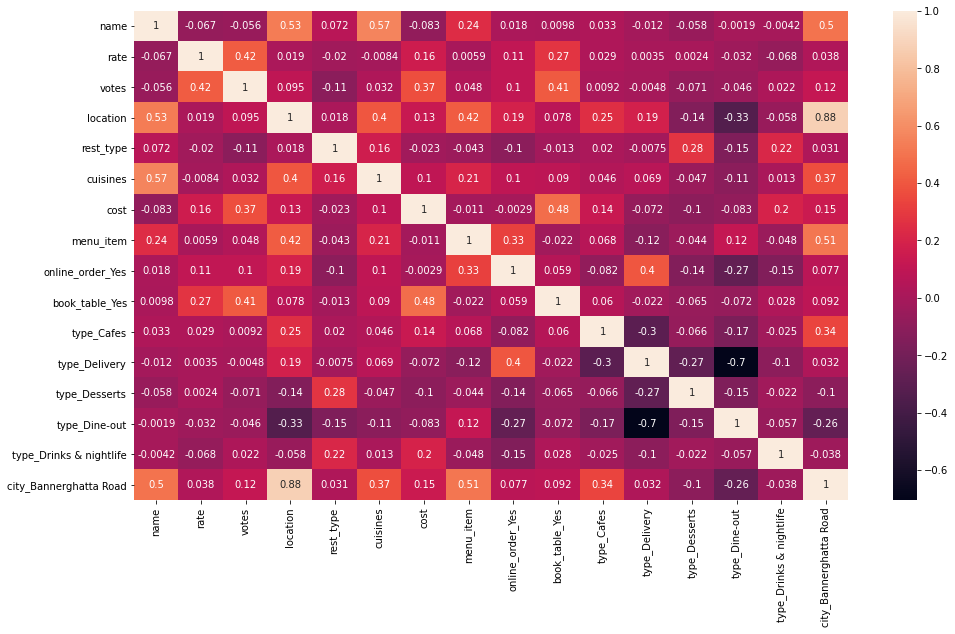

In [ ]:
plt.figure(figsize=(16,9)) # To see the image somewhat big
sns.heatmap(df3.corr(),annot=True) # plotting heatmap with the features correlation; in short seeing the features how much they correlate with each other

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



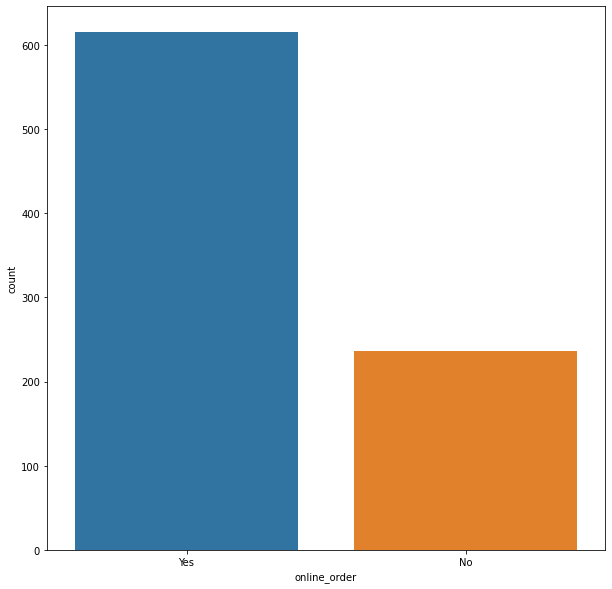

In [ ]:
sns.countplot(df['online_order']) # Draw countplot to see online_order feature counts
fig=plt.gcf() # to adjust the figure
fig.set_size_inches(10,10) # to make the figure big

Here we can see that more than 60% people prefer online_order

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



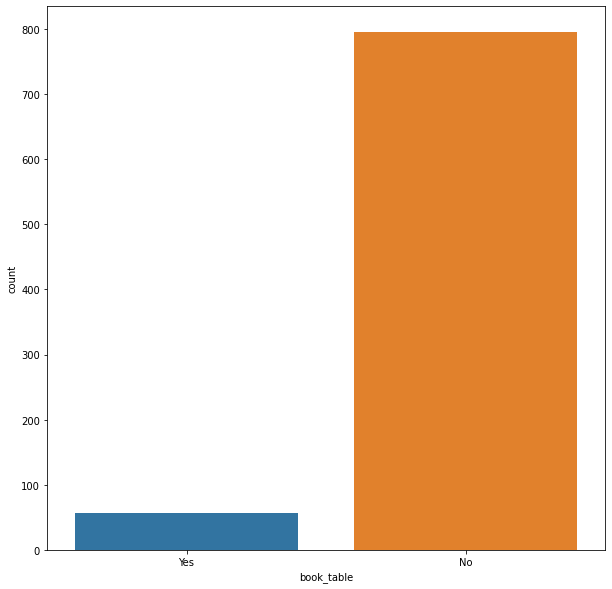

In [ ]:
sns.countplot(df['book_table']) # Draw countplot to see book_table feature counts
fig=plt.gcf() # to adjust the figure
fig.set_size_inches(10,10) # to make the figure big

Here we can see that more than 75% people prefer to not book the table

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



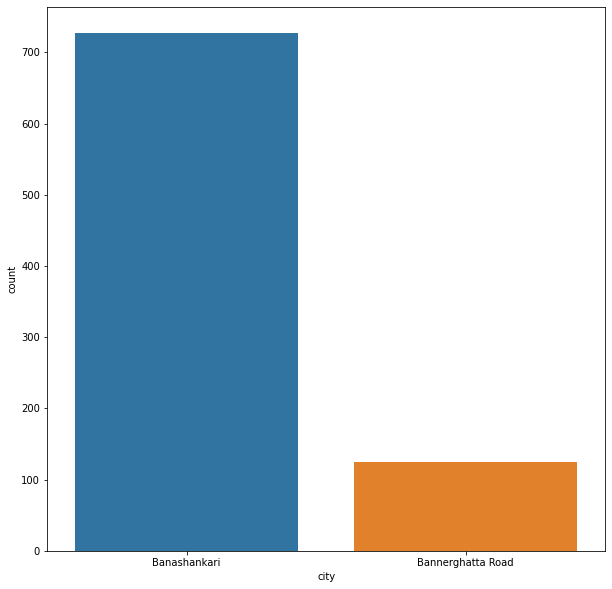

In [ ]:
sns.countplot(df['city']) # Draw countplot to see city feature counts
fig=plt.gcf() # to adjust the figure
fig.set_size_inches(10,10) # to make the figure big

The data that we have recieved is biased more than towards Banashankari city

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



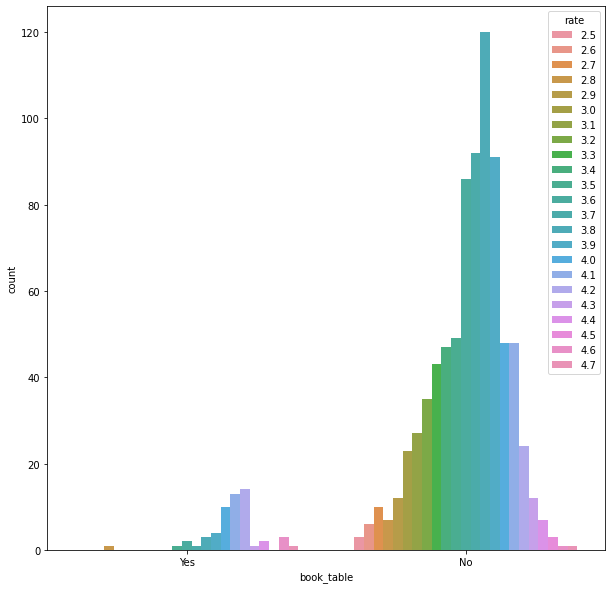

In [ ]:
sns.countplot(df['book_table'],hue=df3['rate']) # Draw countplot to see book_table feature with rate
fig=plt.gcf() # to adjust the figure
fig.set_size_inches(10,10) # to make the figure big

Here the data that we have seen is very messy so we have better approach than this

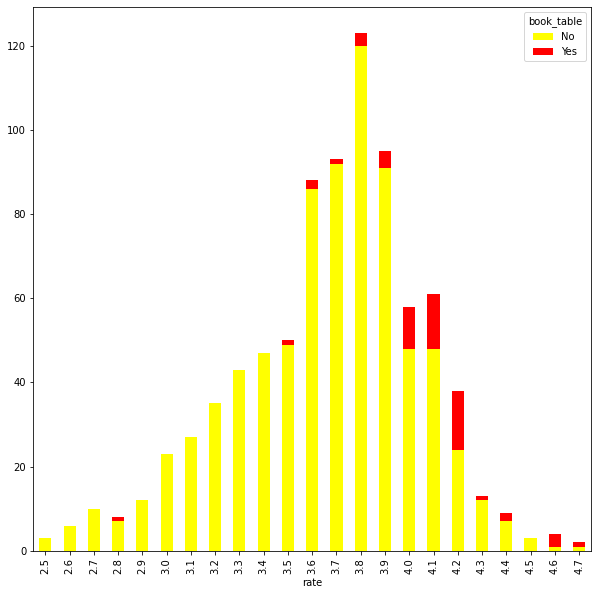

In [ ]:
y_=pd.crosstab(df3['rate'],df['book_table']) # creating a dataframe of crosstab between rate and book_table
y_.plot(kind='bar',stacked=True,color=['yellow','red']) # creating a bar plot with stacked equal to True
fig=plt.gcf() # to adjust the figure
fig.set_size_inches(10,10) # to make the figure big

The people that book table is usually giving the high rate but the people that does not book the table are not giving much rate, this shows that the book_table customers are more satishfied than the customers who does not book the table. 

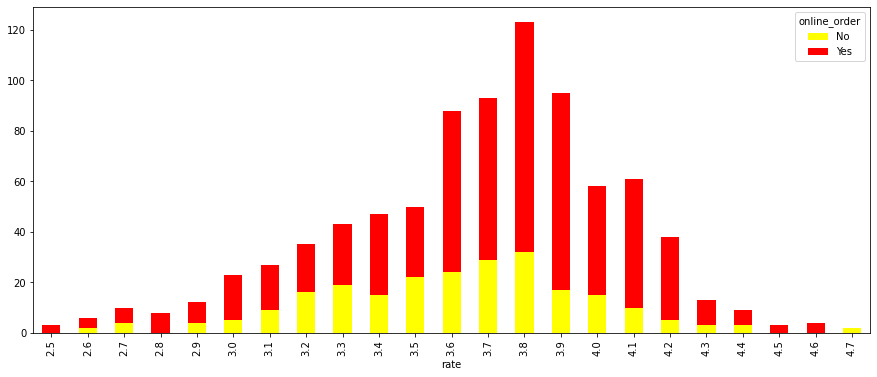

In [ ]:
y_=pd.crosstab(df3['rate'],df['online_order']) # creating a dataframe of crosstab between rate and online_order
y_.plot(kind='bar',stacked=True,color=['yellow','red'],figsize =(15,6)) # creating a bar plot with stacked equal to True

Here we can see no such relation, means online_order with yes and no are somewhat equally rated

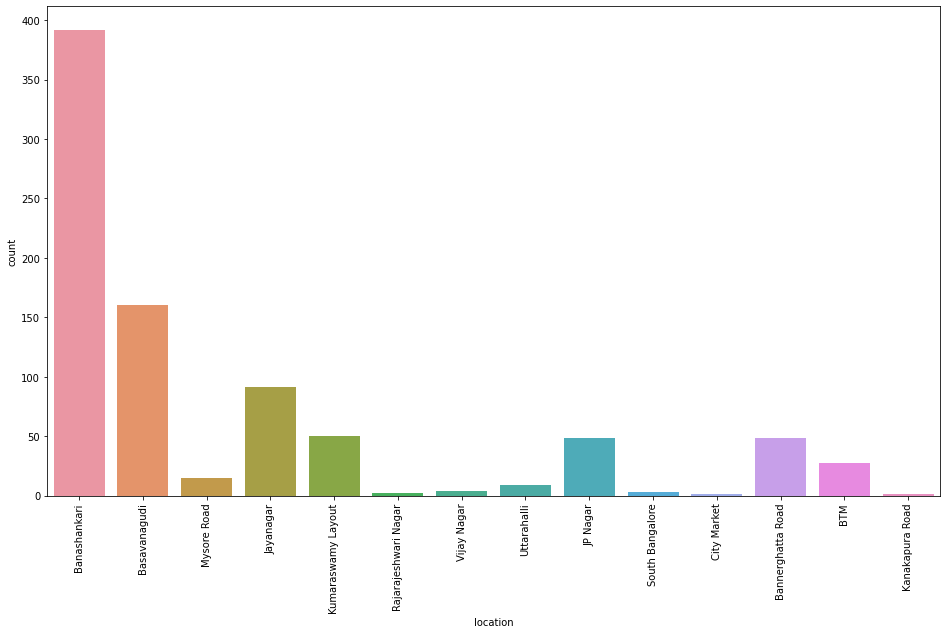

In [ ]:
plt.figure(figsize=(16,9)) #Set the figure size
chart=sns.countplot(x=df['location']) # Countplot with location feature 
chart.set_xticklabels(labels=df['location'].unique(),rotation=90) # Setting the rotation of labels
None #To not return xticklabels

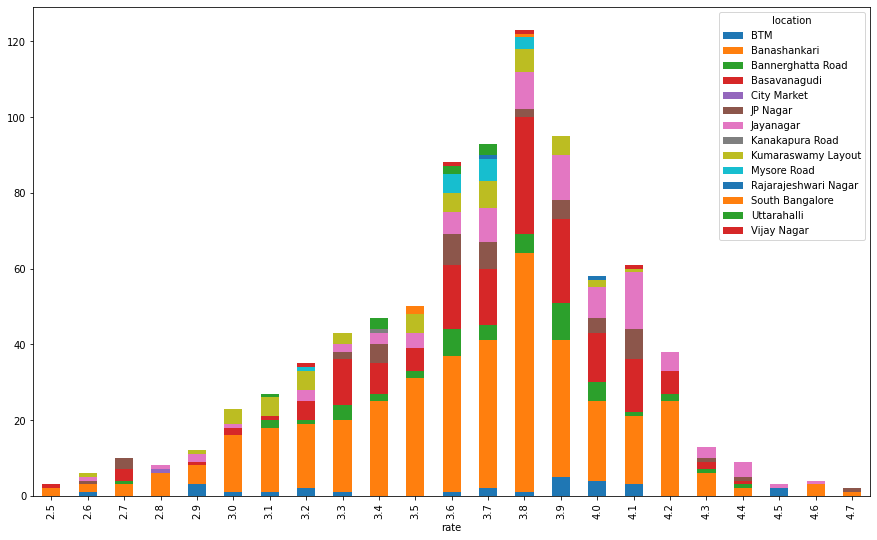

In [ ]:
y_=pd.crosstab(df3['rate'],df['location']) # creating a dataframe of crosstab between rate and location
y_.plot(kind='bar',stacked=True,figsize =(15,9)) # creating a bar plot with stacked equal to True

In [ ]:
px.bar(pd.crosstab(df3['rate'],df['location'])) # Creating this same thing with plotly for better understanding

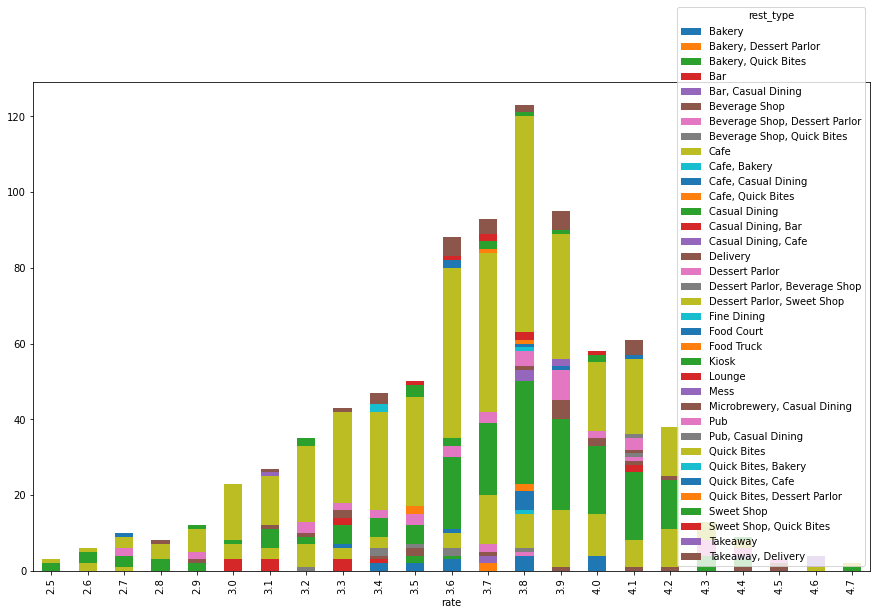

In [ ]:
y_=pd.crosstab(df3['rate'],df['rest_type']) # creating a dataframe of crosstab between rate and rest_type
y_.plot(kind='bar',stacked=True,figsize =(15,9),) # creating a bar plot with stacked equal to True

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



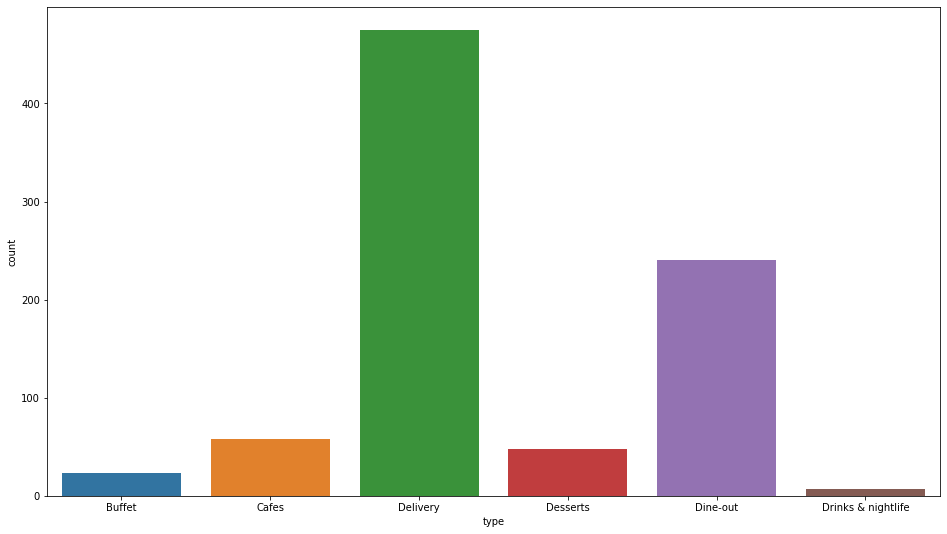

In [ ]:
plt.figure(figsize=(16,9)) #To increase the size of image
sns.countplot(df['type']) # draw countplot 

Text(0.5, 1.0, 'Type of services')

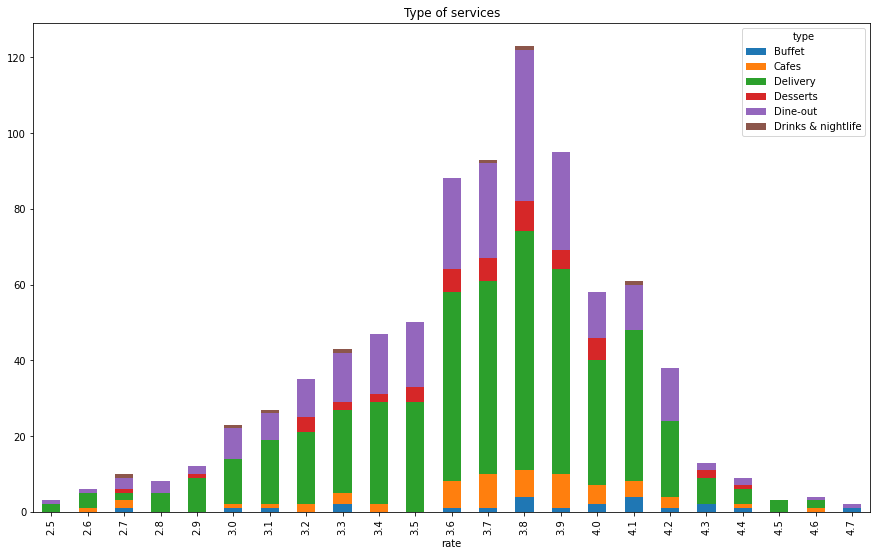

In [ ]:
y_=pd.crosstab(df3['rate'],df['type']) # creating a dataframe of crosstab between rate and type
y_.plot(kind='bar',stacked=True,figsize =(15,9),) # creating a bar plot with stacked equal to True
plt.title('Type of services') # Create the title of the figure

In [ ]:
px.scatter(data_frame=df3,x=df3['rate'],y=df3['cost']) # Plot scatter plot with plotly for the analysis between rate and cost

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Top 20 hotels in Banglure')

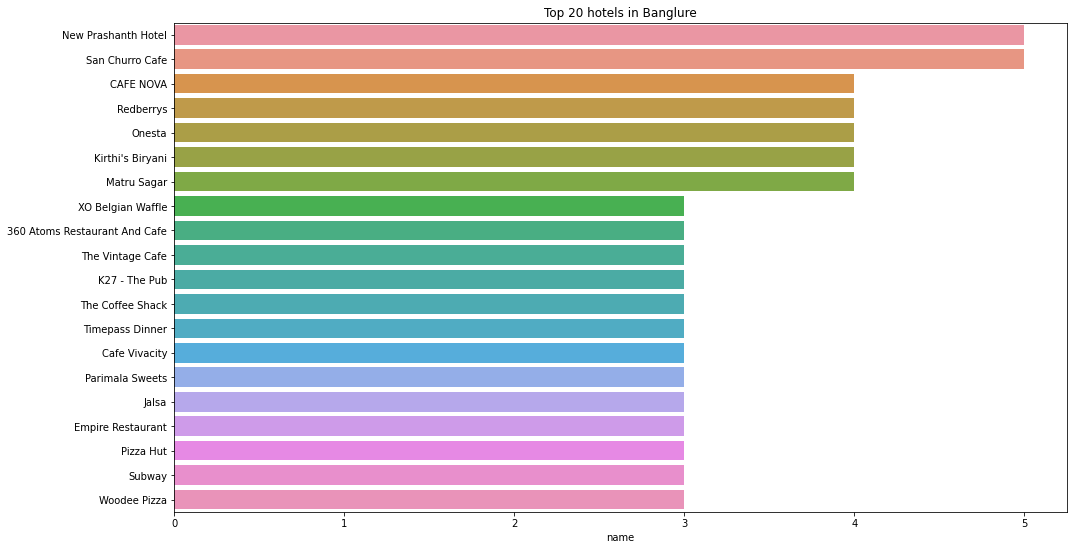

In [ ]:
plt.figure(figsize=(16,9)) # To increase the size of the image
sns.barplot(df['name'].value_counts()[:20],df['name'].value_counts()[:20].index) # Plotting barplot of 20 famous hotels
plt.title('Top 20 hotels in Banglure') # Create the title of the figure

## Seeing the accuracy without applying hyperparameter and much feature engineering and data Preprocessing

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error #importing different metrics for analysis

In [ ]:
def compute_score(y_true,y_pred): # create the function that will compute the r2_score,mean_absolute_error and mean_squared_error
    '''This will compute the r2_score,mean_absolute_error and mean_squared_error
    args:
        y_true: provide the true y label means y_test
        y_pred: provide the pred y label'''
    r2=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    print(f'r2_score is: {r2}\n mean_absolute_error is: {mae}\n mean_squared_error is {mse}')

### Seeing the prediction by Linear Models

In [ ]:
from sklearn.linear_model import LinearRegression # import LinearRegression for training
lr=LinearRegression() # LinearRegression model initialize
lr.fit(x_train,y_train) # fitting the x_train,y_train
y_pred=lr.predict(x_test) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.24446052520232098
 mean_absolute_error is: 158.22038130650247
 mean_squared_error is 41794.19270791407


In [ ]:
from sklearn.linear_model import Ridge # import RidgeRegression for training
r=Ridge() # Ridge model initialize
r.fit(x_train,y_train) # fitting the x_train,y_train
y_pred=r.predict(x_test) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.24555495828055118
 mean_absolute_error is: 158.1106325915856
 mean_squared_error is 41733.65193075651


In [ ]:
from sklearn.linear_model import Lasso # import LassoRegression for training
l=Lasso() # Lasso model initialize
l.fit(x_train,y_train) # fitting the x_train,y_train
y_pred=l.predict(x_test) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.2430877658250984
 mean_absolute_error is: 158.5646514873468
 mean_squared_error is 41870.12966669257


### Seeing the predictions by Trees

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # import RandomForestRegressor for training
rf=RandomForestRegressor() # RandomForestRegressor model initialize
rf.fit(x_train,y_train) # fitting the x_train,y_train
y_pred=rf.predict(x_test) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.7157150802576158
 mean_absolute_error is: 89.87771929824561
 mean_squared_error is 15725.794767836258


In [ ]:
from sklearn.tree import DecisionTreeRegressor # DecisionTreeRegressor model initialize
dtr=DecisionTreeRegressor() # DecisionTreeRegressor model initialize
dtr.fit(x_train,y_train) # fitting the x_train,y_train
y_pred=dtr.predict(x_test) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.3035888162470439
 mean_absolute_error is: 110.23391812865498
 mean_squared_error is 38523.3918128655


In [ ]:
from sklearn.tree import ExtraTreeRegressor # ExtraTreeRegressor model initialize
etr=ExtraTreeRegressor() # ExtraTreeRegressor model initialize
etr.fit(x_train,y_train) # fitting the x_train,y_train
y_pred=etr.predict(x_test) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.4198775907636666
 mean_absolute_error is: 114.32748538011695
 mean_squared_error is 32090.643274853803


In [ ]:
from sklearn.ensemble import AdaBoostRegressor # AdaBoostRegressor model initialize
ab=AdaBoostRegressor() # AdaBoostRegressor model initialize
ab.fit(x_train,y_train) # fitting the x_train,y_train
y_pred=ab.predict(x_test) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.543988677832925
 mean_absolute_error is: 133.52641594480775
 mean_squared_error is 25225.187712058338


### Seeing the prediction by Support Vector Machines

In [ ]:
from sklearn.svm import SVR # Support Vector Regressor model initialize
sv=SVR() # SupportVectorRegressor model initialize
sv.fit(x_train,y_train) # fitting the x_train,y_train
y_pred=sv.predict(x_test) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.06488943133202618
 mean_absolute_error is: 174.00745222420642
 mean_squared_error is 51727.530610603746


#  Result: As we have seen form above RandomForestRegressor doing the best prediction

## Analysis of Models by doing some feature engineering on this existing data

In [ ]:
def correlation(dataset, threshold): # Seeing the most correlated features
    '''This will take the dataset and the thereshold value for the correlation
        and return the column that have the correlation greater than the threshold'''
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr() 
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
correlation(dataset=df3,threshold=0.7)  # calling the correlation funtion to get high correlated columns

{'city_Bannerghatta Road', 'type_Dine-out'}

In [ ]:
rf.fit(x_train.drop(['city_Bannerghatta Road', 'type_Dine-out'],axis=1),y_train) # Apply Random forest after droping high correlated features
y_pred=rf.predict(x_test.drop(['city_Bannerghatta Road', 'type_Dine-out'],axis=1)) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.715921077057727
 mean_absolute_error is: 90.02701754385964
 mean_squared_error is 15714.399638596491


In [ ]:
# Extracting the information regarding importance of each feature in the prediction
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(x_train, y_train)
mutual_info

array([0.35884756, 0.13856547, 0.29788955, 0.04249678, 0.49112367,
       0.30636252, 0.0314318 , 0.02096657, 0.09749729, 0.03184081,
       0.03370141, 0.04536271, 0.0494878 , 0.00422712, 0.        ])

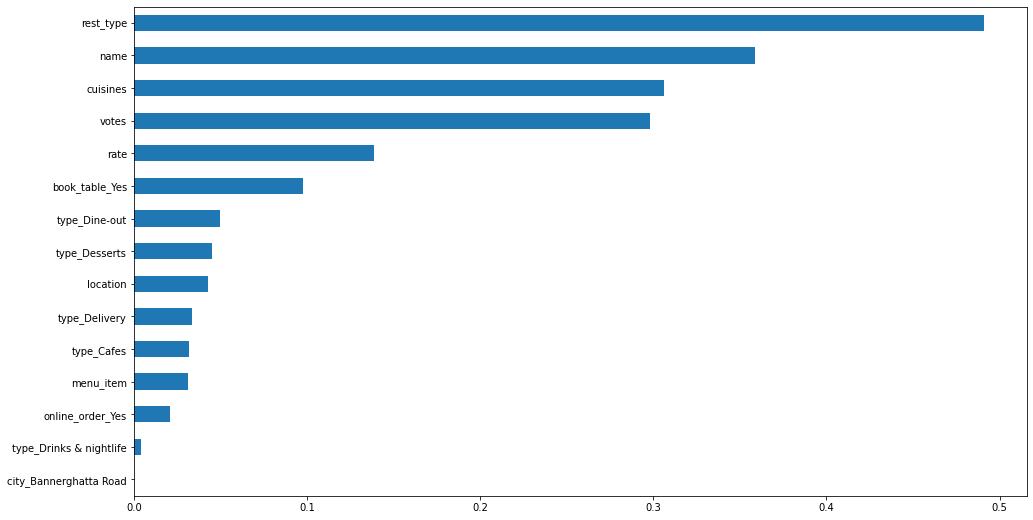

In [ ]:
mutual_info_df=pd.Series(mutual_info) # convert mutual_infoto pandas series
mutual_info_df.index=x_train.columns # initialize the columns
mutual_info_df.sort_values(ascending=True).plot(kind='barh',figsize=(16,9)) # Draw the figure

### Note: 
* we have convert 'location','name','rest_type','cuisines','menu_item' features into ordinal encoding but in reality they don't have any kind of relation with them.
* So, this may be a mistake beacause as we know when catagorical features doesn't have any kind of realtion then we use something called as one hot encoding

In [ ]:
dummy=pd.get_dummies(df,columns=['location','name','rest_type','cuisines','menu_item','online_order','book_table','type','city'],drop_first=True)

In [ ]:
X=dummy.drop(['cost'],axis=1) # Seperate the independent features
Y=dummy['cost'] # Seperate the dependent ('cost') from independent feature
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42) #split into x_train,x_test,y_train,y_test with 20% of test size

In [ ]:
rf=RandomForestRegressor() # RandomForestRegressor model initialize
rf.fit(x_train,y_train) # fitting the x_train,y_train
y_pred=rf.predict(x_test) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.7605936438987342
 mean_absolute_error is: 82.78964912280702
 mean_squared_error is 13243.2463374269


In [ ]:
from sklearn.ensemble import  ExtraTreesRegressor# ExtraTreesRegressor importing the ExtraTreesRegressor
et=ExtraTreesRegressor() # ExtraTreesRegressor model initialize
et.fit(x_train,y_train) # fitting the x_train,y_train
y_pred=et.predict(x_test) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.7267286752516344
 mean_absolute_error is: 72.0111111111111
 mean_squared_error is 15116.555506432751


In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.7MB/s 


In [ ]:
'''
So we convert these features into category_encoders with some base because there is so much catagories and our model may get 
the problem of Curse of Dimensionality.
''' 
import category_encoders as ce
encoder= ce.BaseNEncoder(cols=['location','name','rest_type','cuisines','menu_item','online_order','book_table','type','city'],return_df=True,base=5)
data_encoded=encoder.fit_transform(df)
data_encoded

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



,name_0,name_1,name_2,name_3,name_4,online_order_0,online_order_1,book_table_0,book_table_1,rate,votes,location_0,location_1,location_2,rest_type_0,rest_type_1,rest_type_2,rest_type_3,cuisines_0,cuisines_1,cuisines_2,cuisines_3,cuisines_4,cost,menu_item_0,menu_item_1,menu_item_2,menu_item_3,menu_item_4,type_0,type_1,type_2,city_0,city_1
0,0,0,0,0,1,0,1,0,1,4.1,775.0,0,0,1,0,0,0,1,0,0,0,0,1,800,0,0,0,0,1,0,0,1,0,1
1,0,0,0,0,2,0,1,0,2,4.1,787.0,0,0,1,0,0,0,1,0,0,0,0,2,800,0,0,0,0,1,0,0,1,0,1
2,0,0,0,0,3,0,1,0,2,3.8,918.0,0,0,1,0,0,0,2,0,0,0,0,3,800,0,0,0,0,1,0,0,1,0,1
3,0,0,0,0,4,0,2,0,2,3.7,88.0,0,0,1,0,0,0,3,0,0,0,0,4,300,0,0,0,0,1,0,0,1,0,1
4,0,0,0,1,0,0,2,0,2,3.8,166.0,0,0,2,0,0,0,1,0,0,0,1,0,600,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,4,2,4,1,0,1,0,1,4.0,739.0,0,2,2,0,0,0,1,0,2,2,2,0,800,0,1,4,2,4,0,0,3,0,2
995,0,4,2,4,2,0,1,0,2,4.0,117.0,0,2,2,0,0,0,1,0,0,2,4,2,500,0,0,0,0,1,0,0,3,0,2
996,0,4,2,4,3,0,1,0,2,3.9,255.0,0,2,3,0,0,0,1,0,1,4,0,2,500,0,1,4,3,0,0,0,3,0,2
997,0,4,2,4,4,0,1,0,2,4.0,1974.0,0,1,4,0,0,0,1,0,2,2,2,3,800,0,1,4,3,1,0,0,3,0,2


In [ ]:
X=data_encoded.drop(['cost'],axis=1) # Seperate the independent features
Y=data_encoded['cost'] # Seperate the dependent ('cost') from independent feature
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42) #split into x_train,x_test,y_train,y_test with 20% of test size

In [ ]:
rf=RandomForestRegressor() # RandomForestRegressor model initialize
rf.fit(x_train,y_train) # fitting the x_train,y_train
y_pred=rf.predict(x_test) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.7277395975662817
 mean_absolute_error is: 88.19941520467836
 mean_squared_error is 15060.634295906433


### Note: Dummy catagorical encoding is doing better so we apply this in whole dataset

## Now applying the Standralization techniques

In [ ]:
from sklearn.preprocessing import StandardScaler # Import The StandardScaler

In [ ]:
ss=StandardScaler() # Initialize The StandardScaler
x_ss=ss.fit_transform(dummy.drop(['cost'],axis=1)) # fit_transform the StandardScaler with dummy encoded data
ss_df=pd.DataFrame(data=x_ss,columns=dummy.drop(['cost'],axis=1).columns) # Convert the numpy array into dataframe

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(ss_df,Y,test_size=0.2,random_state=42) #split into x_train,x_test,y_train,y_test with 20% of test size

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # import RandomForestRegressor for training
rf=RandomForestRegressor() # RandomForestRegressor model initialize
rf.fit(x_train,y_train) # fitting the x_train,y_train
y_pred=rf.predict(x_test) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.746684379776325
 mean_absolute_error is: 84.56122807017545
 mean_squared_error is 14012.665387719298


In [ ]:
from sklearn.preprocessing import MinMaxScaler # Import The MinMaxScaler

In [ ]:
mms=MinMaxScaler() # Initialize The MinMaxScaler
x_mms=mms.fit_transform(dummy.drop(['cost'],axis=1)) # fit_transform the MinMaxScaler with dummy encoded data
mms_df=pd.DataFrame(data=x_mms,columns=dummy.drop(['cost'],axis=1).columns) # Convert the numpy array into dataframe

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(mms_df,Y,test_size=0.2,random_state=42) #split into x_train,x_test,y_train,y_test with 20% of test size
from sklearn.ensemble import RandomForestRegressor  # import RandomForestRegressor for training
rf=RandomForestRegressor() # RandomForestRegressor model initialize
rf.fit(x_train,y_train) # fitting the x_train,y_train
y_pred=rf.predict(x_test) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.7493042437206843
 mean_absolute_error is: 83.42578947368422
 mean_squared_error is 13867.74231988304


In [ ]:
from sklearn.preprocessing import RobustScaler # Import The RobustScaler

In [ ]:
rs=RobustScaler() # Initialize The RobustScaler
x_rs=rs.fit_transform(dummy.drop(['cost'],axis=1)) # fit_transform the RobustScaler with dummy encoded data
rs_df=pd.DataFrame(data=x_rs,columns=dummy.drop(['cost'],axis=1).columns) # Convert the numpy array into dataframe

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(rs_df,Y,test_size=0.2,random_state=42) #split into x_train,x_test,y_train,y_test with 20% of test size
from sklearn.ensemble import RandomForestRegressor  # import RandomForestRegressor for training
rf=RandomForestRegressor() # RandomForestRegressor model initialize
rf.fit(x_train,y_train) # fitting the x_train,y_train
y_pred=rf.predict(x_test) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.7504365516834052
 mean_absolute_error is: 83.66625730994153
 mean_squared_error is 13805.106416959065


### Result:
* So here Standralization, Min_Max_Scalar(Normalization) and RobustScaler don't do any good or bad so we leave it and go with the original dataset(dummy)

# Feature Selection

In [ ]:
dummy_highly_correlated_lst=list(correlation(dataset=dummy,threshold=0.7))  # calling the correlation funtion (it is definde in 'Analysis of Models by doing some feature engineering on this existing data' section) to get high correlated columns 

In [ ]:
len(dummy_highly_correlated_lst)

519

In [ ]:
X_dummy=dummy.drop(['cost'],axis=1) # Seperate the independent features
Y_dummy=dummy['cost'] # Seperate the dependent ('cost') from independent feature
x_train_dummy,x_test_dummy,y_train_dummy,y_test_dummy=train_test_split(X_dummy,Y_dummy,test_size=0.2,random_state=42) #split into x_train,x_test,y_train,y_test with 20% of test size

In [ ]:
rf.fit(x_train_dummy.drop(dummy_highly_correlated_lst,axis=1),y_train_dummy) # Apply Random forest after droping high correlated features
y_pred_dummy=rf.predict(x_test_dummy.drop(dummy_highly_correlated_lst,axis=1)) # predict the x_test
compute_score(y_test_dummy,y_pred_dummy) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.7550381428181945
 mean_absolute_error is: 83.97356725146199
 mean_squared_error is 13550.560105263157


In [ ]:
from sklearn.feature_selection import SelectFromModel # For feature Selection
from sklearn.linear_model import Lasso # Import Lasso as feature Selection model

In [ ]:
sel_features=SelectFromModel(Lasso(alpha=0.005))  # Initialize SelectFromModel along Lasso with 0.005 alpha values
sel_features.fit(X_dummy,Y_dummy) # Fiting the model
X_dummy_lasso_list=list(X_dummy.columns[sel_features.get_support()]) # returns the colums choose by Lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 248518.0697185291, tolerance: 5337.122497062281



In [ ]:
rf.fit(x_train_dummy[X_dummy_lasso_list],y_train_dummy) # Apply Random forest after droping high correlated features
y_pred_dummy=rf.predict(x_test_dummy[X_dummy_lasso_list]) # predict the x_test
compute_score(y_test_dummy,y_pred_dummy) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.7577169228526915
 mean_absolute_error is: 83.77959064327486
 mean_squared_error is 13402.377974853802


### Here the Accuracy metrics are increase little bit and it's also reduce the dimension/Columns that are a good sign for us so we keep this change.

In [ ]:
dummy_1=dummy[X_dummy_lasso_list].copy() # Make a copy of this dummy with lasso suggested features.
x_train_dummy_1=x_train_dummy[X_dummy_lasso_list].copy() # Make a copy of this train with lasso suggested features.
x_test_dummy_1=x_test_dummy[X_dummy_lasso_list].copy() # Make a copy of this test with lasso suggested features.

### Now see the Accuracy with boosting techniques

In [ ]:
from sklearn.ensemble import AdaBoostRegressor # AdaBoostRegressor model initialize
ab=AdaBoostRegressor() # AdaBoostRegressor model initialize
ab.fit(x_train_dummy_1,y_train) # fitting the x_train,y_train
y_pred=ab.predict(x_test_dummy_1) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.47670071269417835
 mean_absolute_error is: 143.598458500599
 mean_squared_error is 28947.35746723262


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor() # GradientBoostingRegressor model initialize
gb.fit(x_train_dummy_1,y_train) # fitting the x_train,y_train
y_pred=ab.predict(x_test_dummy_1) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.47670071269417835
 mean_absolute_error is: 143.598458500599
 mean_squared_error is 28947.35746723262


In [ ]:
from xgboost import XGBRegressor # importing the XGBRegressor for training
xg=XGBRegressor() # XGBRegressor model initialize
xg.fit(x_train_dummy_1.to_numpy(),y_train.to_numpy()) # fitting the x_train,y_train
y_pred=xg.predict(x_test_dummy_1.to_numpy()) # predict the x_test
compute_score(y_test.to_numpy(),y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

[12:03:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score is: 0.6757457844630705
 mean_absolute_error is: 107.25756443313688
 mean_squared_error is 17936.777127539135


In [ ]:
from sklearn.ensemble import RandomForestRegressor # RandomForestRegressor importing the ExtraTreesRegressor
rf=RandomForestRegressor() # RandomForestRegressor model initialize
rf.fit(x_train_dummy_1,y_train) # fitting the x_train,y_train
y_pred=rf.predict(x_test_dummy_1) # predict the x_test
compute_score(y_test,y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.7554795437457226
 mean_absolute_error is: 81.41760233918129
 mean_squared_error is 13526.143121052632


## So, RandomForestRegressor and XGBRegressor gives us the best accuracy so we will keep these models for Hyperparameter Tunning.

In [ ]:
from sklearn.model_selection import GridSearchCV # importing GridSearchCVfor hyperparameter
# when use hyperthread, xgboost may become slower
parameters = {'nthread':[4], # Parameters that we want to pass
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
grid=GridSearchCV(estimator=xg,param_grid=parameters,cv=5,verbose=3) # initialize the GridSearchCV

In [ ]:
grid.fit(x_train_dummy_1.to_numpy(),y_train.to_numpy()) # fitting the GridSearchCV with x_train_dummy_1 and y_train

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=5, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7, score=0.622, total=   4.4s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=5, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7, score=0.736, total=   4.3s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=5, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.7s remaining:    0.0s


[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7, score=0.594, total=   4.4s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=5, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7, score=0.724, total=   4.3s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=5, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7, score=0.725, total=   4.4s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=6, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silen

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                        

In [ ]:
y_pred=grid.predict(x_test_dummy_1.to_numpy()) # predict the x_test
compute_score(y_test.to_numpy(),y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.7261140486319398
 mean_absolute_error is: 91.78145095200567
 mean_squared_error is 15150.554819829056


In [ ]:
from sklearn.model_selection import RandomizedSearchCV # importing RandomizedSearchCV hyperparameter
parameters = {                        # Parameters that we want to pass
        'num_boost_round': [10, 25, 50],
        'eta': [0.05, 0.1, 0.3],
        'max_depth': [3, 4, 5],
        'subsample': [0.9, 1.0],
        'colsample_bytree': [0.9, 1.0],
    }
random=RandomizedSearchCV(estimator=xg,param_distributions=parameters,cv=5,verbose=3) # initialize the RandomizedSearchCV

In [ ]:
random.fit(x_train_dummy_1.to_numpy(),y_train.to_numpy()) # fitting the RandomizedSearchCV with x_train_dummy_1 and y_train

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.9, num_boost_round=10, max_depth=3, eta=0.1, colsample_bytree=0.9 
[12:16:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.9, num_boost_round=10, max_depth=3, eta=0.1, colsample_bytree=0.9, score=0.649, total=   0.8s
[CV] subsample=0.9, num_boost_round=10, max_depth=3, eta=0.1, colsample_bytree=0.9 
[12:16:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  subsample=0.9, num_boost_round=10, max_depth=3, eta=0.1, colsample_bytree=0.9, score=0.748, total=   0.8s
[CV] subsample=0.9, num_boost_round=10, max_depth=3, eta=0.1, colsample_bytree=0.9 
[12:16:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV]  subsample=0.9, num_boost_round=10, max_depth=3, eta=0.1, colsample_bytree=0.9, score=0.640, total=   0.8s
[CV] subsample=0.9, num_boost_round=10, max_depth=3, eta=0.1, colsample_bytree=0.9 
[12:16:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.9, num_boost_round=10, max_depth=3, eta=0.1, colsample_bytree=0.9, score=0.690, total=   0.8s
[CV] subsample=0.9, num_boost_round=10, max_depth=3, eta=0.1, colsample_bytree=0.9 
[12:16:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.9, num_boost_round=10, max_depth=3, eta=0.1, colsample_bytree=0.9, score=0.706, total=   0.8s
[CV] subsample=0.9, num_boost_round=25, max_depth=4, eta=0.1, colsample_bytree=0.9 
[12:16:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.9, num_boost_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   48.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [ ]:
y_pred=random.predict(x_test_dummy_1.to_numpy()) # predict the x_test
compute_score(y_test.to_numpy(),y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.7340901444358803
 mean_absolute_error is: 95.0827220002113
 mean_squared_error is 14709.340963761595


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=5,verbose=3) # initialize the GridSearchCV
rs.fit(x_train_dummy_1.to_numpy(),y_train.to_numpy()) # fitting the GridSearchCV with x_train_dummy_1 and y_train

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, score=0.560, total=  21.3s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.3s remaining:    0.0s


[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, score=0.757, total=  22.0s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.3s remaining:    0.0s


[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, score=0.653, total=  21.9s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, score=0.681, total=  21.5s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, score=0.729, total=  22.1s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=0.441, total=   1.3s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
y_pred=rs.predict(x_test_dummy_1.to_numpy()) # predict the x_test
compute_score(y_test.to_numpy(),y_pred) # computing the r2_score,mean_absolute_error and mean_squared_error

r2_score is: 0.7824926792226987
 mean_absolute_error is: 82.07351771897615
 mean_squared_error is 12031.856948815166
